In [2]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [3]:
markers_df = pd.read_csv("m2_right_actuator_simple2_markers.csv")

In [4]:
markers_df

,M0X,M0Y,M0T,M1X,M1Y,M1T,M2X,M2Y,M2T,M3X,...,M7T,M8X,M8Y,M8T,M9X,M9Y,M9T,M10X,M10Y,M10T
0,0.0,0.0,0,1.363647,77.863647,0,4.500000,128.000000,0,8.000000,...,0,12.500000,517.222229,0,17.000000,569.000000,0,12.500000,648.500000,0
1,0.0,0.0,0,1.730774,78.000000,0,4.613464,128.247925,0,8.000000,...,0,12.500000,517.318176,0,17.000000,569.000000,0,12.500000,648.500000,0
2,0.0,0.0,0,1.500000,77.863647,0,4.500000,127.863647,0,8.162598,...,0,12.500000,516.863647,0,17.000000,568.863647,0,13.000000,648.363647,0
3,0.0,0.0,0,1.730774,77.863647,0,4.500000,127.590942,0,8.000000,...,0,12.500000,516.863647,0,17.000000,568.863647,0,12.500000,648.363647,0
4,0.0,0.0,0,1.500000,77.812500,0,4.500000,128.000000,0,8.162598,...,0,12.500000,517.000000,0,17.000000,569.000000,0,12.500000,648.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.0,0.0,0,1.764160,77.376465,0,4.881165,127.311523,0,8.264160,...,0,12.264160,517.590088,0,16.764160,569.226440,0,11.764160,648.226440,0
223,0.0,0.0,0,1.578674,78.121460,0,4.578674,128.036255,0,8.078674,...,0,12.078674,518.172607,0,16.578674,569.808960,0,11.809448,648.308960,0
224,0.0,0.0,0,1.764160,77.538940,0,5.264160,127.626465,0,8.264160,...,0,12.264160,517.726440,0,16.764160,569.226440,0,12.264160,648.226440,0
225,0.0,0.0,0,1.753967,77.375977,0,4.753967,127.563477,0,8.353943,...,0,12.253967,517.563477,0,16.753967,569.063477,0,11.984741,647.563477,0


In [5]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

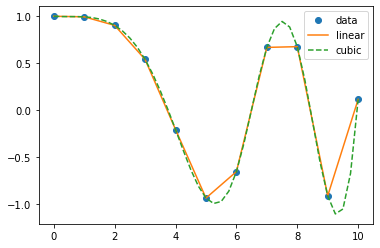

In [6]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [7]:
curve_idx = 100
num_points = 11
points = markers_df.loc[curve_idx, :]
x = []
y = []
for i in range(num_points):
    x_str = "M" + str(i) + "X"
    y_str = "M" + str(i) + "Y"
    x.append(points[x_str])
    y.append(points[y_str])

(-350, 350)

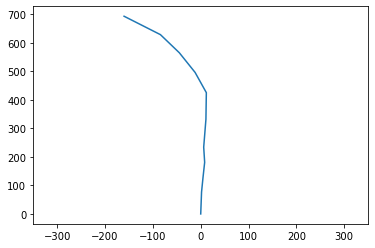

In [8]:
plt.plot(x,y)
plt.xlim([-350,350])

(-350, 350)

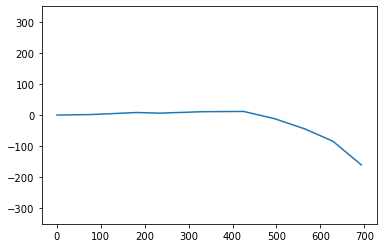

In [9]:
plt.plot(y,x)
plt.ylim([-350,350])

In [10]:
# returns high order terms to low order terms ax^k, ax^k-1, ... , ax^1, ax^0
def leastSquaresPolynomial(x, y, order):
    n = len(x)
    M = np.zeros((order+1, order+1))
    b = np.zeros((order+1, 1))
    #build up the M matrix
    M[0][0] = n
    for k in range(1,(2*order)+1):
        #print("break")
        total = 0
        for i in range(n):
            total += x[i]**k
        r = 0
        c = k
        while r <= k and c >= 0:
            #print(str(r) + ", " + str(c))
            if r <= order and r >= 0 and c <= order and c >=0:
                M[r][c] = total
            r += 1
            c -= 1
    
    #build the b matrix
    for k in range(order+1):
        total = 0
        for i in range(n):
            total += y[i] * (x[i]**k)
        b[k][0] = total
    
    a = []
    det_M = np.linalg.det(M)
    
    for k in range(0, order+1):
        Mi = M.copy()
        Mi[:, k] = b[:, 0]
        det_Mi = np.linalg.det(Mi)
        a_k = det_Mi / det_M
        a.append(a_k)
    a.reverse()
    return a

[1.2389010134661018e-12, -3.855848838907552e-09, 1.8977811493927001e-06, -0.00026859001080814765, 0.04281932005118105, -0.03088431797055536]


(-350, 350)

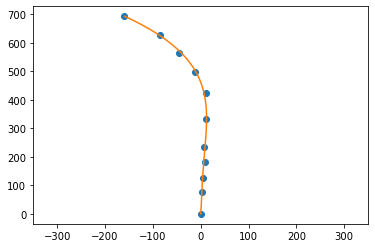

In [20]:
a = leastSquaresPolynomial(y, x, 5)
print(a)
#print(y)
poly = np.poly1d(a)
new_y = np.linspace(y[0], y[-1])
new_x = poly(new_y)
plt.plot(x, y, "o", new_x, new_y)
#plt.xlim([x[0]-1, x[-1] + 1 ])
#xnew = np.linspace(0, 693, num=41, endpoint=True)
#ynew = f2(xnew)
# plt.plot(x, y, 'o', ynew, xnew, '--')
# plt.legend(['data', 'cubic'], loc='best')
plt.xlim([-350,350])
# plt.show()

In [10]:
f2

In [11]:
f2.range

AttributeError: 'interp1d' object has no attribute 'range'